# Load Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

#資料集是以dictionary的形式存在
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Turn into DataFrame

In [3]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()
df_feat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Preprocessing

In [4]:
X = df_feat.iloc[:, ].values
y = cancer['target']

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

# Train FNN

In [5]:
%env KERAS_BACKEND = tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD,adam

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [6]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # Remove the CWD from sys.path while we load stuff.
c:\users\howard\appdata\local\programs\python\python36\lib\site-packages\ipykernel_

In [7]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time
classifier.fit(X_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
455/455 [==============================] - 2s 4ms/step - loss: 0.6929 - acc: 0.6154
Epoch 2/100
455/455 [==============================] - 0s 42us/step - loss: 0.6917 - acc: 0.6484
Epoch 3/100
455/455 [==============================] - 0s 31us/step - loss: 0.6903 - acc: 0.6637
Epoch 4/100
455/455 [==============================] - 0s 37us/step - loss: 0.6881 - acc: 0.7033
Epoch 5/100
455/455 [==============================] - 0s 35us/step - loss: 0.6848 - acc: 0.7714
Epoch 6/100
455/455 [==============================] - 0s 31us/step - loss: 0.6797 - acc: 0.8659
Epoch 7/100
455/455 [==============================] - 0s 35us/step - loss: 0.6732 - acc: 0.8945
Epoch 8/100
455/455 [==============================] - 0s 33us/step - loss: 0.6608 - acc: 0.9253
Epoch 9/100
455/455 [==============================] - 0s 37us/step - loss: 0.6465 - acc: 0.9429
Epoch 10/100
455/455 [==============================] - 0s 33us/step - loss: 0.6252 - acc: 0.9451
Epoch 11/100
455/455 [========

# Predict Results(test)

## Original Model

In [9]:
from sklearn.metrics import roc_auc_score

In [10]:
from sklearn.metrics import roc_auc_score
y_pred = classifier.predict(X_test)
roc_auc_score(y_test,y_pred)

0.9926960939980947

In [12]:
from sklearn.metrics import roc_curve, auc  ###計算roc和auc

<Figure size 432x288 with 0 Axes>

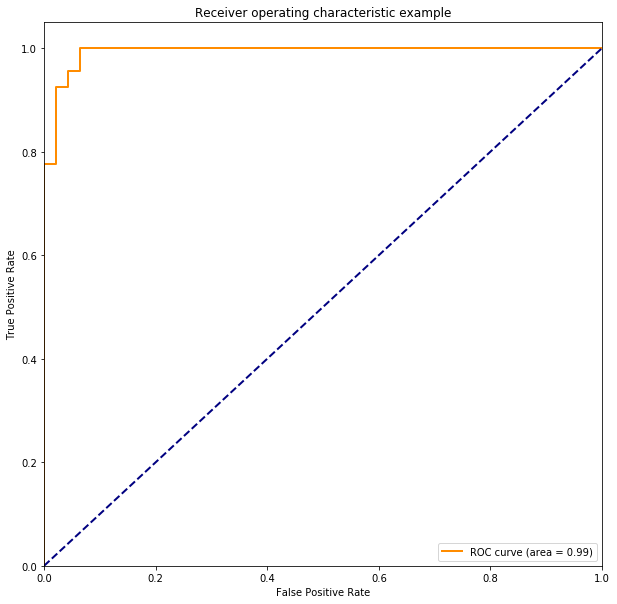

In [13]:
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###計算真正率和假正率
roc_auc = auc(fpr,tpr) ###計算auc的值
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Our accuracy is 94.73684210526315%


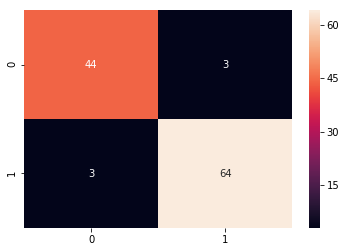

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_original = confusion_matrix(y_test, y_pred)

print("Our accuracy is {}%".format(((cm_original[0][0] + cm_original[1][1])/114)*100))

sns.heatmap(cm_original,annot=True)
plt.savefig('original.png')

# Optimization Preprocessing

In [15]:
init_weights = classifier.get_weights()

In [9]:
def FlattenWeights(weights):
        """
        flatten weights
        
        param weights: keras神經網路的權重格式:nparray包在list中
        return WeightsStrucure : 神經網路各層的權重shape包在list中，unflatten時會用到
        return FlattenedWeights : 一維list包含所有的權重
        """
        WeightsStrucure = []
        FlattenedWeights = []
        for i_layer in weights:
            WeightsStrucure.append(i_layer.shape)
            if len(i_layer.shape) == 1 :# 該層權重的shape為一維 e.g. (15,)      
                FlattenedWeights.extend(i_layer)
            else :# 該層權重的shape為二維 e.g. (30, 15)  
                for i_links in i_layer:
                    FlattenedWeights.extend(i_links)
        return WeightsStrucure, FlattenedWeights

def UnflattenWeights(WeightsStrucure, ModifiedWeights):
    """
    Unflatten(回復成原本的結構) weights  

    param WeightsStrucure : 神經網路各層的權重shape包在list中
    param ModifiedWeights : 一維list包含所有meteHeuristic修改過的權重
    return: keras神經網路的權重格式:nparray包在list中
    """
    UnflattenWeights = []
    i_index = 0 
    for i_layer in WeightsStrucure:
        if len(i_layer) == 1 : # 該層權重的shape為一維 e.g. (15,)      
            TempList = ModifiedWeights[i_index:(i_index + i_layer[0])]
            TempList = np.asarray(TempList)
            i_index = i_index + i_layer[0]
        else : # 該層權重的shape為二維 e.g. (30, 15)  
            TempList = ModifiedWeights[i_index:(i_index + (i_layer[0]*i_layer[1]))]
            TempList = np.reshape(TempList, i_layer )
            i_index = i_index + (i_layer[0]*i_layer[1])
        UnflattenWeights.append(TempList)
    return UnflattenWeights    

def score(X_train= X_train,y_train = y_train ,Model = None):
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    mis_classification = 1 - ((cm[0][0] + cm[1][1])/114)
    return mis_classification

# SA Optimization

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [18]:
init_model = classifier # 保存舊模型
structure, weights =FlattenWeights(init_weights) # 拉平初始權重

In [20]:
%%time
def Optimize_SA(model = None , score = None , initT = 1000, minT = 1 , iterL = 5000 , delta = 0.95, k = 1, init_weights = None, structure = None):
    old_score = score(model)
    nowt = initT 
    # start SA!
    while nowt > minT:
        for i in range(iterL):
            # 初始舊權重計算分數
            # 製作新的權重
            xnew = init_weights + (np.random.rand(len(init_weights)) - 0.5)
            process_weights = UnflattenWeights(structure, xnew )
            model.set_weights(process_weights)
            new_score = score(model)
            # 計算分數差異
            res = new_score - old_score
            if res < 0:
                init_weights = xnew
                old_score = new_score
            else:
                p = np.exp(-res / (k * nowt))
                if np.random.rand() < p:
                    init_weights = xnew
                    old_score = new_score
                else:
                    pass
            nowt = nowt * delta
    return model

SA_Model = Optimize_SA(model = classifier, score = score, init_weights= weights, structure= structure)

Wall time: 18.2 s


# Predict Results(test)

## SA Model

Our accuracy is 100.0%


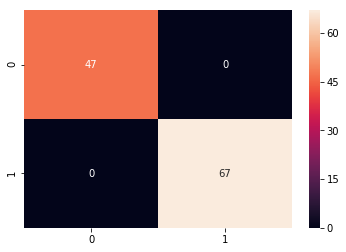

In [131]:
# Predicting the Test set results
y_pred = SA_Model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/114)*100))

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

# Make Procedure of looping optimization

In [10]:
def loop_optimization():
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    # Adding the second hidden layer
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(p=0.1))
    # Adding the output layer
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Fit initial model 
    classifier.fit(X_train,y_train,batch_size=100,epochs=100)
    # Get initial weights
    init_weights = classifier.get_weights()
    # Get initila score
    init_misclassify_rate = score(classifier)
    # preserve model and flatten weight
#     init_model = classifier # 保存舊模型
    structure, weights =FlattenWeights(init_weights) # 拉平初始權重
    
    for i in range(200):
        # SA Optimization loop 5000 round
        SA_Model = Optimize_SA(model = classifier, score = score, init_weights= weights, structure= structure)
        SA_misclassify_rate = score(classifier)

        if SA_misclassify_rate < init_misclassify_rate :
            # get SA weight
            print("SA-"+str(i)+"!")
            init_weights = classifier.get_weights()
            structure, weights =FlattenWeights(init_weights) # 拉平初始權重
            init_misclassify_rate = SA_misclassify_rate
        else :
            # recover the original model
            classifier.set_weights(init_weights)
            structure, weights =FlattenWeights(init_weights) # 拉平初始權重
            
        # Adam re-training
        classifier.fit(X_train,y_train,batch_size=100,epochs=100)
    
    final_score = score(classifier)